# SUPERVISED LEARNING MODELS AND HYPERPARAMETERS

[- French contents: Regression Lineaire](https://machinelearnia.com/regression-lineaire-simple/)

[- French contents : Supervised learning in 4 steps ](https://machinelearnia.com/apprentissage-supervise-4-etapes/)

[- Sklearn content : Models](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

#### Nice to know before starting : Build you ML model in 4 steps 

1- How many examples and features are in dataset?  
2- What is the function you have chosen for your model?  
3- Which Cost Function did you select?  
4- And what is the learning algorithm you use?

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.linear_model import LogisticRegression , LinearRegression 
from sklearn.neighbors import KNeighborsClassifier

import apply_preprocessing_10 as apply_pp

In [2]:
#Import Dataset

Data = pd.read_csv('Dataset/BostonHousing.csv', sep =',')
Data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [3]:
#Shape
Data.shape

(506, 14)

In [4]:
#Data spliting 

train, test = train_test_split(Data, shuffle=True, test_size=0.2, random_state=50)
test.to_csv('Dataset/test.csv', header=True, index=False, sep=',')

In [5]:
#Preprocessing

pp_X_train , pp_y_train  = apply_pp.apply_preprocessing(train,is_training=True)  # To retrieve our target medv

In [6]:
pp_X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
449,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97
253,0.36894,22.0,5.86,0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64


In [7]:
pp_y_train .head()

,medv
0,13
1,13
2,42
3,12
4,10


## 1 - Models Evaluation (MAE) and vusalisation

####  1. a) Linear model(simple)

[French content](https://machinelearnia.com/regression-lineaire-simple/)  
[Sklearn content : Linear model API](https://scikit-learn.org/stable/modules/classes.html)

In [8]:
pp_X_train.shape , pp_y_train.shape

((404, 13), (404, 1))

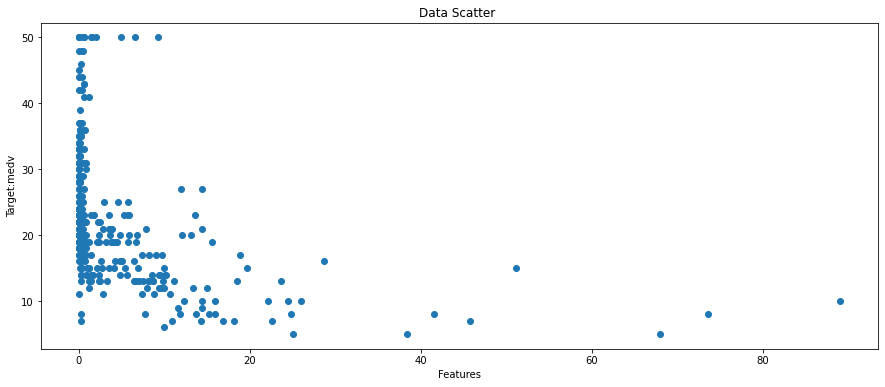

In [9]:
#Data Visualisation 

plt.figure(figsize = (15,6))
plt.title("Data Scatter ")
plt.ylabel("Target:medv")
plt.xlabel("Features")

    
plt.scatter(pp_X_train.iloc[: , :1], pp_y_train)
plt.show()

In [10]:
#LinearRegression
modelLinReg = LinearRegression()
#Fit the model ( predict , will be used in test )
modelLinReg.fit(pp_X_train,pp_y_train)
#Score
modelLinRegXTrain_Score = modelLinReg.score(pp_X_train,pp_y_train)

print('- Score : Return the coefficient of determination od the prediction : ', modelLinRegXTrain_Score)

- Score : Return the coefficient of determination od the prediction :  0.7509929548248566


####  1. b) Support Vector Machines (Regression)

In [13]:
from sklearn import svm

In [18]:
model_SCM_Regr = svm.SVR()
model_SCM_Regr.fit(pp_X_train, pp_y_train)
model_SCM_Regr_Score = model_SCM_Regr.score(pp_X_train,pp_y_train)
print('support vector machine score :',model_SCM_Regr_Score)

support vector machine score : 0.22883968240101982


In [11]:
# Save/serialize the fitted model to local OS
 
with open('pickle/modelLinReg.pkl', 'wb') as output_file:
    pickle.dump(modelLinReg, output_file)

with open('pickle/pp_X_train.pkl', 'wb') as output_file:
    pickle.dump(pp_X_train, output_file)
    
with open('pickle/pp_y_train.pkl', 'wb') as output_file:
    pickle.dump(pp_y_train, output_file)
